#### Leitura de dados e algumas limpezas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leitura dos dados em um Data frame
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
# Lista o tipo dos campos
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [3]:
# Lista toda as colunas com campos nulo
print(df.columns[df.isnull().any()])

Index(['children', 'country', 'agent', 'company'], dtype='object')


In [21]:
# Investiga domínio do campo children e tipo
print(df['children'].unique())
print(df['children'].dtype)
print(df['meal'].unique())
print(df['meal'].dtype)


[ 0.  1.  2. 10.  3. nan]
float64
['BB' 'FB' 'HB' 'SC' 'Undefined']
object


In [ ]:
# Trocando valores vazios:
# agent: Se não há agente informado, considerera-se que a própria pessoa fez reserva.
# company: Se não há agência informado, considerera-se que a própria pessoa fez reserva..
# cauntry: trocando valor vazio de país para desconhecido.
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
df = df.fillna(nan_replacements)

# "meal" conforme dicionário "Undefined" é o mesmo que 'SC'.
df["meal"].replace("Undefined", "SC", inplace=True)

# Algumas linhas contém o mesmo tempo 0 adults, 0 children and 0 babies. 
# Dropando linhas com 0 hospedes.
zero_guests = list(df.loc[df["adults"]
                   + df["children"]
                   + df["babies"]==0].index)
df.drop(df.index[zero_guests], inplace=True)

In [18]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

#### a) Elaborar uma análise descritiva da base de dados, análise gráfica e por tabelas.

O principal interesse no problema é compreender como as variáveis condicionais fornecidas se relacionam com o status da variável de interesse *'is_canceled'*, relativa ao cancelamento ou não da reserva.

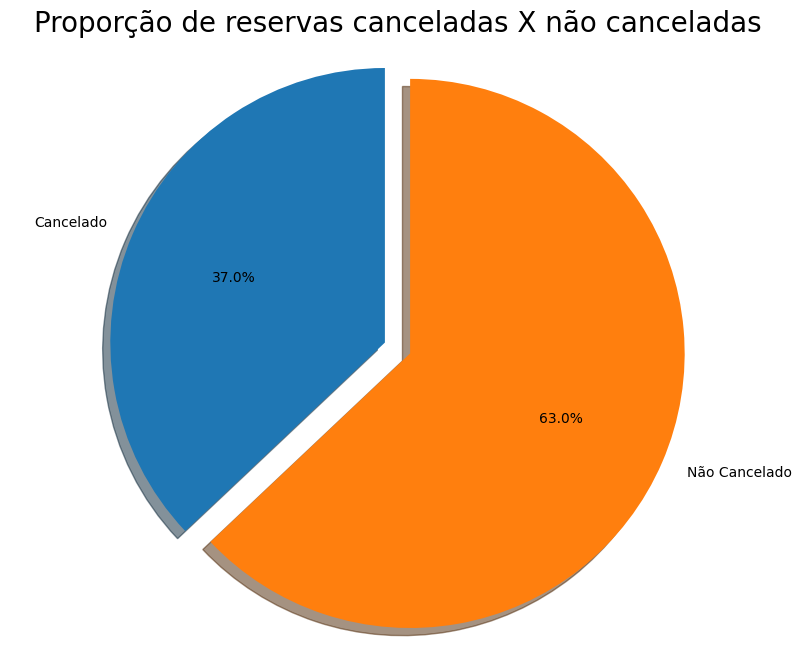

In [19]:
labels = 'Cancelado', 'Não Cancelado'
sizes = [df.is_canceled[df['is_canceled']==1].count(), df.is_canceled[df['is_canceled']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proporção de reservas canceladas X não canceladas", size = 20)
plt.show()